In [ ]:
# connect google drive to colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# copy ORAND-CAR-2014.tar.gz to colab content
!cp /content/drive/MyDrive/ORAND-CAR-2014.tar.gz /content/

In [ ]:
import tarfile

# consider a path and get zip data and extract this data
local_file_path = '/content/ORAND-CAR-2014.tar.gz'

with tarfile.open(local_file_path, 'r:gz') as tar:
    tar.extractall('/content/extracted_files')

!ls /content/extracted_files

ORAND-CAR-2014


In [ ]:
# import libraries
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import numpy as np

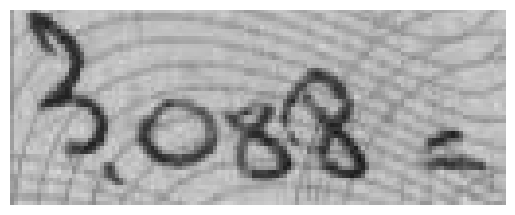

In [ ]:
# consider a path that we saved the images then show an image if exist
# or show error if not
image_dir = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images'

image_files = os.listdir(image_dir)

if image_files:
    image_file = image_files[0]
    image_path = os.path.join(image_dir, image_file)

    image = Image.open(image_path)

    plt.imshow(image)
    plt.axis('off')
    plt.show()
else:
    print("No images found in the directory.")


#labels are saved like:
a\_car\_007000.png   1500  
a\_car\_007001.png   5743  
a\_car\_007002.png   1056  
a\_car\_007003.png   1000  
a\_car\_007004.png   1000  
a\_car\_007005.png   2800  
a\_car\_007006.png   1480  
a\_car\_007007.png   3600

In [ ]:
# Define the path to the label file and save labels in a dictionary
label_file_path = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_gt.txt'

labels = {}
with open(label_file_path, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            filename, label = parts
            labels[filename] = int(label)


In [ ]:
show_some_labels = {k: labels[k] for k in list(labels)[:10]}
show_some_labels

{'a_car_000154.png': 2250,
 'a_car_000155.png': 60,
 'a_car_000156.png': 100,
 'a_car_000157.png': 925,
 'a_car_000158.png': 200,
 'a_car_000159.png': 10248,
 'a_car_000160.png': 25441,
 'a_car_000161.png': 280000,
 'a_car_000162.png': 22970,
 'a_car_000163.png': 25574}

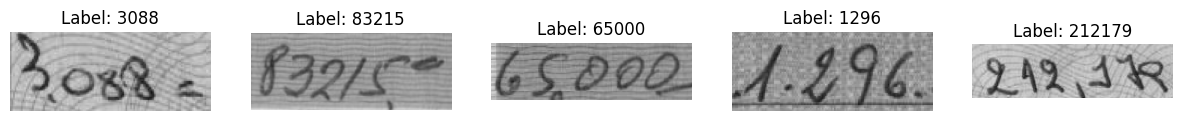

In [ ]:
# show some images in shuffle
image_dir = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images'

num_images_to_show = 5
image_files = os.listdir(image_dir)

fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))
for i in range(num_images_to_show):
    if i >= len(image_files):
        break
    image_file = image_files[i]
    image_path = os.path.join(image_dir, image_file)

    image = Image.open(image_path)
    label = labels.get(image_file, 'Unknown')

    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label}')

plt.show()


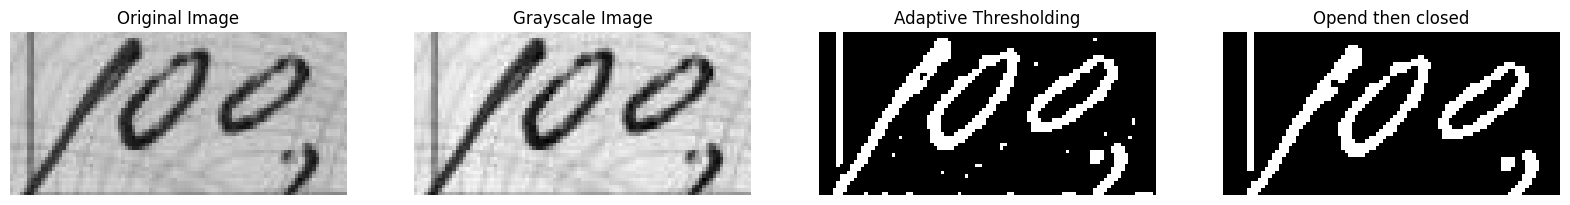

In [ ]:
# do some preprocess on image to make it more simple to recognize
# then show this image in different part of preprocessing
image_file_path = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images/a_car_000180.png'

image = cv2.imread(image_file_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

threshold_image = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 9
)
# _, threshold_image = cv2.threshold(blurred_image,190,255, cv2.THRESH_BINARY_INV)


threshold_image = cv2.bitwise_not(threshold_image)

kernel = np.ones((2, 2), np.uint8)

opened_image = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_OPEN, kernel)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')

axes[2].imshow(threshold_image, cmap='gray')
axes[2].set_title('Adaptive Thresholding')
axes[2].axis('off')

axes[3].imshow(closed_image, cmap='gray')
axes[3].set_title('Opend then closed')
axes[3].axis('off')

plt.show()

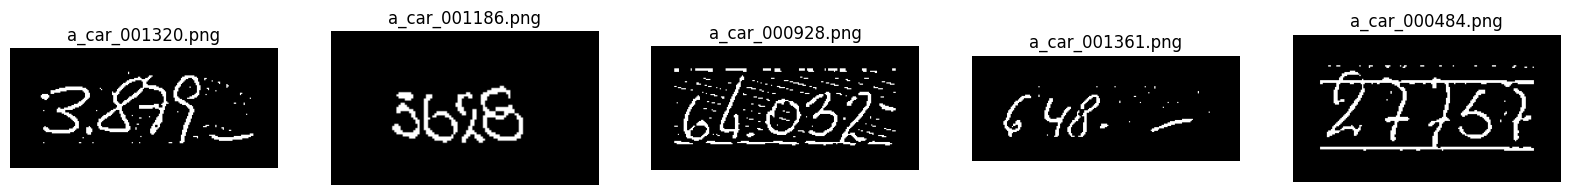

In [ ]:
# do the above processes for all the images in a_train and save preprocessed images in new location
source_dir = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images'
destination_dir = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images_preproc'

os.makedirs(destination_dir, exist_ok=True)

image_files = [f for f in os.listdir(source_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

def preprocess_image(image_path, dest_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, (5,5), 0)

    threshold_image = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9,9
    )
    # _, threshold_image = cv2.threshold(blurred_image,130,255, cv2.THRESH_BINARY_INV)


    threshold_image = cv2.bitwise_not(threshold_image)

    kernel = np.ones((2, 2), np.uint8)

    opened_image = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel)
    closed_image = cv2.morphologyEx(threshold_image, cv2.MORPH_CLOSE, kernel)
    img_proc = cv2.copyMakeBorder(closed_image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=0)

    cv2.imwrite(dest_path, img_proc)

for image_file in image_files:
    source_file_path = os.path.join(source_dir, image_file)
    dest_file_path = os.path.join(destination_dir, image_file)

    preprocess_image(source_file_path, dest_file_path)

def display_sample_images(directory, num_samples=5):
    sample_files = np.random.choice([f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))], num_samples, replace=False)
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
    for ax, file_name in zip(axes, sample_files):
        img = cv2.imread(os.path.join(directory, file_name), cv2.IMREAD_GRAYSCALE)
        ax.imshow(img, cmap='gray')
        ax.set_title(file_name)
        ax.axis('off')
    plt.show()

display_sample_images(destination_dir)


In [ ]:
import shutil

# remove new folder if needed
folder_path = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images_preproc'
shutil.rmtree(folder_path)

print(f"The folder '{folder_path}' has been deleted.")


The folder '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images_preproc' has been deleted.


In [ ]:
# some additional search to find best solution

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def is_digit(contour):
#     M = cv2.moments(contour)
#     print(M)

#     if M["m00"] == 0:
#         return False

#     # Calculate aspect ratio (width / height)
#     x, y, w, h = cv2.boundingRect(contour)
#     aspect_ratio = float(w) / h

#     # Analyze contour area and perimeter for digit filtering
#     area = cv2.contourArea(contour)
#     perimeter = cv2.arcLength(contour, True)

#     # Define thresholds based on digit characteristics
#     min_aspect_ratio = 0.5
#     max_aspect_ratio = 1.5
#     min_area = 10
#     max_area = 1000
#     min_perimeter = 10
#     max_perimeter = 1000

#     # Check if aspect ratio, area, and perimeter fall within digit ranges
#     if (min_aspect_ratio <= aspect_ratio <= max_aspect_ratio and
#         min_area <= area <= max_area and
#         min_perimeter <= perimeter <= max_perimeter):
#         return True
#     else:
#         return False

# def recognize_digit(contour):
#     # Approximate the contour with simpler shapes
#     approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

#     # Identify digits based on the number of corners in the approximation
#     if len(approx) == 4:
#         return "4"
#     elif len(approx) == 6:
#         # Distinguish between 6 and 8 based on aspect ratio (heuristic)
#         M = cv2.moments(contour)
#         aspect_ratio = float(M["mu20"] / M["mu02"]) if M["mu02"] != 0 else 1
#         if aspect_ratio > 1:
#             return "8"
#         else:
#             return "6"  # Replace with logic for handling potential confusion with 9
#     else:
#         return "X"  # Indicate non-target digit or unrecognizable shape

# # Read the image
# img = cv2.imread('/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images/a_car_000225.png')

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# # Apply thresholding
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Find contours
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# # Loop over the contours
# for c in cnts:
#     # Check if the contour resembles a digit
#     if is_digit(c):
#         # Recognize the digit based on its shape
#         digit = recognize_digit(c)

#         # Get the bounding box of the contour
#         (x, y, w, h) = cv2.boundingRect(c)

#         # Print the recognized digit and its position
#         print(f"Found '{digit}' at ({x}, {y})")

#         # Draw a rectangle around the recognized digit (optional)
#         cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# # Convert the image to RGB format for displaying with matplotlib
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Display the image using matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(img_rgb)
# plt.title('Processed Image with Recognized Digits')
# plt.axis('off')
# plt.show()

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input
# from tensorflow.keras.utils import to_categorical

# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Normalize the pixel values
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# # Add a channel dimension
# x_train = x_train[..., np.newaxis]
# x_test = x_test[..., np.newaxis]

# # Convert labels to one-hot encoding
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# # Define the number of classes
# num_classes = 10

# # Define the model
# model = keras.Sequential()
# model.add(Input(shape=x_train[0].shape))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(units=num_classes, activation='softmax'))

# # Print the model summary
# model.summary()

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(x_train, y_train, epochs=10, batch_size=100)

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test accuracy: {test_accuracy}')

# # model.save_weights('Project_mnist_model_weights.h5')

In [ ]:
# import libraries part2(using for training model)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [ ]:
# train a CNN model on MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

num_classes = 10

model = keras.Sequential()
model.add(Input(shape=x_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# # Save the model weights
# model.save_weights('Project_mnist_model_weights.h5')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 916,618 (3.50 MB)

 Trainable params: 915,658 (3.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8954 - loss: 0.3500 - val_accuracy: 0.4275 - val_loss: 2.4046
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9804 - loss: 0.0630 - val_accuracy: 0.9882 - val_loss: 0.0388
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.9898 - val_loss: 0.0340
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9889 - loss: 0.0352 - val_accuracy: 0.9902 - val_loss: 0.0324
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9898 - loss: 0.0299 - val_accuracy: 0.9912 - val_loss: 0.0308
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9914 - val_loss: 0.0301
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9912 - val_loss: 0.0296
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
[[1.0195156e-11 6.5279102e-07 5.4758453e-07 6.4175694e-08 2.2245231e-06
  4.8937010e-10 4.8707509e-12 9.9999654e-01 1.2289940e-08 1.5971499e-10]]


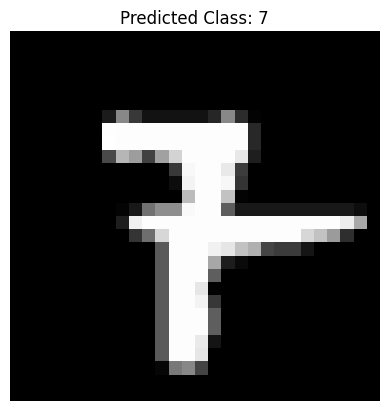

In [ ]:
# choose an images and predict its labels
image = x_test[97]
image_final = np.expand_dims(image, axis=0)

prediction = model.predict(image_final)
print(prediction)
predicted_class = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Recognized digits:  [1, 0, 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


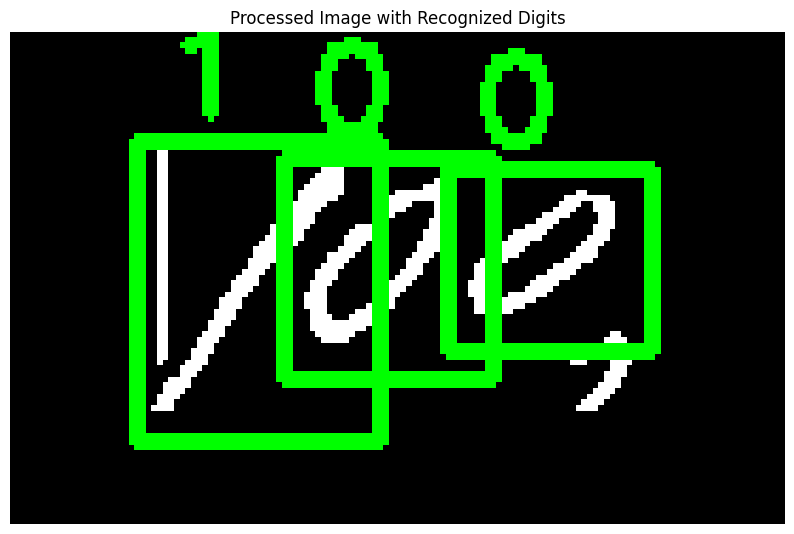

In [ ]:
# choose a multi digit image , find its different contours and
# predict each digit label , using MNIST model


# cuase i have 2 path for image , one before and one after proccess
# i wrote a code to convert before path to after path
def preprocess_image_path(original_path: str, preprocess_dir: str) -> str:
    parts = original_path.split('/')
    parts[parts.index('a_train_images')] = preprocess_dir
    new_path = '/'.join(parts)
    return new_path

# this is a code for preprocess each image(a sample like this is in above cell)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(img, (5, 5), 0)
    # _, img_bin = cv2.threshold(blurred_image,130,255, cv2.THRESH_BINARY_INV)


    img_bin = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9,9
    )
    img_bin = cv2.bitwise_not(img_bin)


    kernel = np.ones((2, 2), np.uint8)
    img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
    img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)
    # print(img_bin)
    img_bin = cv2.copyMakeBorder(img_bin, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=0)
    # plt.figure(figsize=(10, 10))
    # plt.imshow(img_bin, cmap='gray')
    # plt.title('Processed Image with Recognized Digits')
    # plt.axis('off')
    # plt.show()
    return img_bin

# using contours to extract each digit(put condition for chossing a contour)
def extract_digits(img_bin):
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    digit_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 50]
    digit_contours = sorted(digit_contours, key=lambda cnt: cv2.boundingRect(cnt)[0])
    return digit_contours

# def recognize_digit(img_bin, contour):
#     x, y, w, h = cv2.boundingRect(contour)
#     digit_image = img_bin[y - 5:y+h+5, x-5:x+w+5]
#     digit_image = cv2.resize(digit_image, (28, 28))
#     digit_image = digit_image.reshape(1, 28, 28, 1).astype('float32') / 255

#     # Use a pre-trained MNIST model for recognition
#     prediction = model.predict(digit_image)
#     digit = np.argmax(prediction)

#     return digit


# process the image , give it some border
# some the MNIST model can predict it better
# according to the contours, extract the bounding box
# for each image
def recognize_digit(img_bin, contour, padding=5):
    x, y, w, h = cv2.boundingRect(contour)

    x_start = max(x - padding, 0)
    y_start = max(y - padding, 0)
    x_end = min(x + w + padding, img_bin.shape[1])
    y_end = min(y + h + padding, img_bin.shape[0])

    digit_image = img_bin[y_start:y_end, x_start:x_end]

    digit_image = cv2.resize(digit_image, (28, 28))

    # Add padding if the region is too small (in case of shrinkage)
    if digit_image.shape[0] < 28 or digit_image.shape[1] < 28:
        digit_image = cv2.copyMakeBorder(digit_image, 0, 28 - digit_image.shape[0], 0, 28 - digit_image.shape[1],
                                         cv2.BORDER_CONSTANT, value=0)

    digit_image = digit_image.reshape(1, 28, 28, 1).astype('float32') / 255

    prediction = model.predict(digit_image)
    digit = np.argmax(prediction)

    return digit


# get the images and preprocess them then
# extract each digit and predict it using NMIST model
# at last show the labeled image
def main(image_path,preprocess_dir, padding=5):
    img_bin = preprocess_image(image_path)
    digit_contours = extract_digits(img_bin)
    recognized_digits = []

    for contour in digit_contours:
        digit = recognize_digit(img_bin, contour)
        recognized_digits.append(digit)

    print("Recognized digits: ", recognized_digits)

    # image_path_preprocess = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images_preproc/a_car_000717.png'
    image_path_preprocess = preprocess_image_path(image_path, preprocess_dir)

    img = cv2.imread(image_path_preprocess)
    # img = cv2.copyMakeBorder(img, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=0)
    for contour in digit_contours:
        x, y, w, h = cv2.boundingRect(contour)
        digit = recognize_digit(img_bin, contour)
        cv2.rectangle(img, (x-padding, y-padding), (x+w+padding, y+h+padding), (0, 255, 0), 2)
        cv2.putText(img, str(digit), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image with Recognized Digits')
    plt.axis('off')
    plt.show()
    # for i, contour in enumerate(digit_contours):
    #   x, y, w, h = cv2.boundingRect(contour)
    #   digit = recognize_digit(img_bin, contour)
    #   recognized_digits.append(digit)

    #   x_start = max(x - padding, 0)
    #   y_start = max(y - padding, 0)
    #   x_end = min(x + w + padding, img_bin.shape[1])
    #   y_end = min(y + h + padding, img_bin.shape[0])

    #   # Crop the digit region
    #   digit_image = img_bin[y_start:y_end, x_start:x_end]

    #   # # Crop the digit region
    #   # digit_image = img[y - 5:y+h+5, x-5:x+w+5]

    #   # Display each digit as a separate image
    #   plt.figure(figsize=(2, 2))
    #   plt.imshow(cv2.cvtColor(digit_image, cv2.COLOR_BGR2RGB))
    #   plt.title(f'Digit {digit}')
    #   plt.axis('off')
    #   plt.show()

image_path = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images/a_car_000180.png'
preprocess_dir = 'a_train_images_preproc'
main(image_path,preprocess_dir)


In [ ]:
# use a function to calculate the loss
# this function is implemented from zero
# find the errors and divide it by the all corrected digits in image
def calculate_character_loss(predictions, ground_truths):
    total_characters = max(len(predictions), len(ground_truths))
    errors = 0
    for i in range(total_characters):
        if i < len(predictions) and i < len(ground_truths):
            if predictions[i] != ground_truths[i]:
                errors += 1
        else:
            errors += 1
    # loss = errors / total_characters
    return errors


folder_path = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images'

# compare truth labels and predicted one
# then calculate the error rate
def main(folder_path, labels):
    all_recognized_digits = []
    all_ground_truth_digits = []

    for filename, ground_truth in labels.items():
        image_path = os.path.join(folder_path, filename)
        img_bin = preprocess_image(image_path)
        digit_contours = extract_digits(img_bin)

        recognized_digits = []
        for contour in digit_contours:
            digit = recognize_digit(img_bin, contour)
            recognized_digits.append(str(digit))

        recognized_digits_str = ''.join(recognized_digits)
        print(f"Ground Truth: {ground_truth} - Recognized: {recognized_digits_str}")

        all_recognized_digits.append(recognized_digits_str)
        all_ground_truth_digits.append(ground_truth)

    total_loss = 0
    total_digits = 0
    for pred, gt in zip(all_recognized_digits, all_ground_truth_digits):
        print(pred , gt)
        total_loss += calculate_character_loss(str(pred),str(gt))
        total_digits += len(str(gt))

    # print(total_loss ,all_ground_truth_digits )
    # average_loss = total_loss / len(all_ground_truth_digits)
    average_loss = total_loss / total_digits
    print("Average Loss: ", average_loss)

# new_labels = {k: labels[k] for k in list(labels)[:10]}
main(folder_path, labels)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Ground Truth: 895 - Recognized: 04757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Ground Truth: 2500 - Recognized: 227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Ground Truth: 1200 - Recognized: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Ground Truth: 1740 - Recognized: 71740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ground Truth: 4800 - Recognized: 01500


In [ ]:
!pip install Levenshtein
# install levenshtein for detecting the distance between 2 string labels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 44.0 MB/s eta 0:00:00


In [ ]:
# this is a cell just like above but used pre implemented library to
# the distance , at last report more information above the data and predicted one
import Levenshtein

def calculate_character_loss(predictions, ground_truths):
    distance = Levenshtein.distance(predictions, ground_truths)
    # total_characters = max(len(predictions), len(ground_truths))
    # loss = distance / total_characters
    # print("loss",loss)
    return distance

folder_path = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images'
def main2(folder_path, labels):
    all_recognized_digits = []
    all_ground_truth_digits = []

    for filename, ground_truth in labels.items():
        image_path = os.path.join(folder_path, filename)
        img_bin = preprocess_image(image_path)
        digit_contours = extract_digits(img_bin)

        recognized_digits = []
        for contour in digit_contours:
            digit = recognize_digit(img_bin, contour)
            recognized_digits.append(str(digit))

        recognized_digits_str = ''.join(recognized_digits)
        print(f"Ground Truth: {ground_truth} - Recognized: {recognized_digits_str}")

        all_recognized_digits.append(recognized_digits_str)
        all_ground_truth_digits.append(ground_truth)

    total_loss = 0
    total_characters = 0
    total_correct = 0
    exact_matches = 0

    # pred is str and gt is type int
    for pred, gt in zip(all_recognized_digits, all_ground_truth_digits):
        print(pred , gt)
        total_loss += calculate_character_loss(str(pred), str(gt))
        total_characters += max(len(str(pred)), len(str(gt)))
        total_correct += sum(p == g for p, g in zip(str(pred), str(gt)))
        if str(pred) == str(gt):
            exact_matches += 1

    average_loss = total_loss / total_characters
    accuracy = total_correct / total_characters

    print("Average Loss: ", average_loss)
    print("Accuracy: ", accuracy)
    print("Exact Matches: ", exact_matches)

# Test with a subset of labels
# new_labels2 = {k: labels[k] for k in list(labels)[:10]}
main2(folder_path, labels)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Ground Truth: 895 - Recognized: 04757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Ground Truth: 2500 - Recognized: 227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Ground Truth: 1200 - Recognized: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ground Truth: 1740 - Recognized: 71740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Ground Truth: 4800 - Recognized: 01300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


#ML part

In [19]:
# save different path labels in a dictionary named all_labels_dict
label_file_path_a = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_gt.txt'
label_file_path_b = '/content/extracted_files/ORAND-CAR-2014/CAR-B/b_train_gt.txt'
label_file_path_a2 = '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_test_gt.txt'
label_file_path_b2 = '/content/extracted_files/ORAND-CAR-2014/CAR-B/b_test_gt.txt'

all_labels_dict = {}
with open(label_file_path_a, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            filename, label = parts
            all_labels_dict[filename] = str(label)

with open(label_file_path_b, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            filename, label = parts
            all_labels_dict[filename] = str(label)
with open(label_file_path_a2, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            filename, label = parts
            all_labels_dict[filename] = str(label)

with open(label_file_path_b2, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            filename, label = parts
            all_labels_dict[filename] = str(label)

# all_labels_dict = {}

# # Read the labels from a_car file and store them in the dictionary
# with open('a_car.txt', 'r') as file:
#     for line in file:
#         image_file, label = line.strip().split('\t')
#         all_labels_dict[image_file] = int(label)

# # Read the labels from b_car file and store them in the dictionary
# with open('b_car.txt', 'r') as file:
#     for line in file:
#         image_file, label = line.strip().split('\t')
#         all_labels_dict[image_file] = int(label)

In [20]:
len(all_labels_dict)

11719

In [21]:
# import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

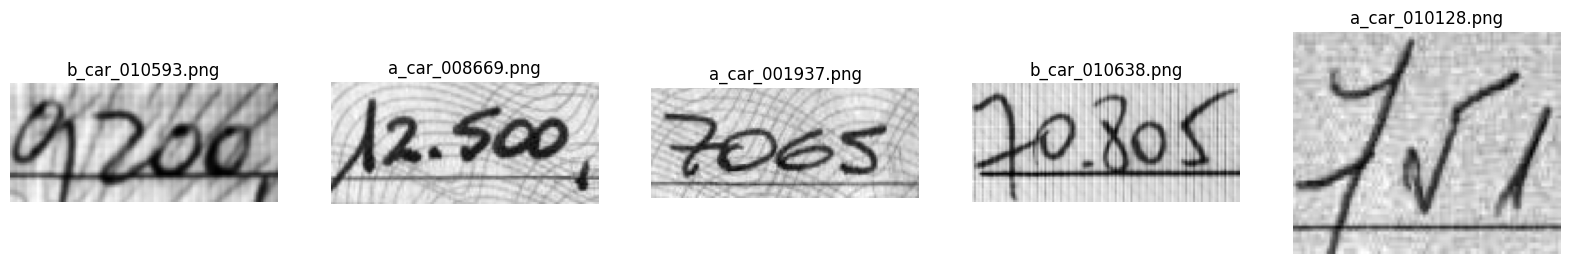

In [47]:
# save all the images in new path(split it to train and validation)
source_dirs = [
    '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_train_images',
    '/content/extracted_files/ORAND-CAR-2014/CAR-B/b_train_images',
    '/content/extracted_files/ORAND-CAR-2014/CAR-A/a_test_images',
    '/content/extracted_files/ORAND-CAR-2014/CAR-B/b_test_images',
]
destination_dir = '/content/all_images_preproc'

os.makedirs(destination_dir, exist_ok=True)

def preprocess_image(image_path, dest_path):

    img_proc = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # image = cv2.imread(image_path)

    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

    # blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # threshold_image = cv2.adaptiveThreshold(
    #     blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 9
    # )

    # threshold_image = cv2.bitwise_not(threshold_image)

    # kernel = np.ones((2, 2), np.uint8)

    # opened_image = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel)
    # closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

    # img_proc = cv2.copyMakeBorder(closed_image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=0)

    cv2.imwrite(dest_path, img_proc)

for source_dir in source_dirs:
    image_files = [f for f in os.listdir(source_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    for image_file in image_files:
        source_file_path = os.path.join(source_dir, image_file)
        dest_file_path = os.path.join(destination_dir, image_file)
        preprocess_image(source_file_path, dest_file_path)

def display_sample_images(directory, num_samples=5):
    sample_files = np.random.choice(
        [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))],
        num_samples,
        replace=False
    )
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
    for ax, file_name in zip(axes, sample_files):
        img = cv2.imread(os.path.join(directory, file_name), cv2.IMREAD_GRAYSCALE)
        ax.imshow(img, cmap='gray')
        ax.set_title(file_name)
        ax.axis('off')
    plt.show()


display_sample_images(destination_dir)


In [41]:
import shutil

folder_path = '/content/all_images_preproc'

shutil.rmtree(folder_path)

print(f"The folder '{folder_path}' has been deleted.")


The folder '/content/all_images_preproc' has been deleted.


In [48]:
sample_to_show_all_label = {k: all_labels_dict[k] for k in list(all_labels_dict)[:10]}
sample_to_show_all_label

{'a_car_000154.png': '2250',
 'a_car_000155.png': '60',
 'a_car_000156.png': '100',
 'a_car_000157.png': '925',
 'a_car_000158.png': '200',
 'a_car_000159.png': '10248',
 'a_car_000160.png': '25441',
 'a_car_000161.png': '280000',
 'a_car_000162.png': '22970',
 'a_car_000163.png': '25574'}

X_train.shape (9375, 128, 32, 1)
X_test.shape (2344, 128, 32, 1)
Example of y_test 588


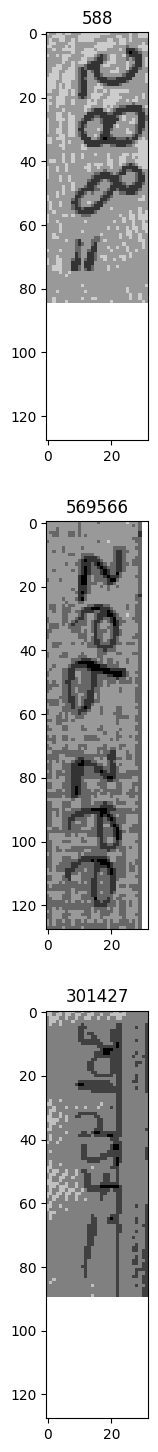

In [49]:
# Constants
alphabets = u"0123456789' "
max_str_len = 10
num_of_characters = len(alphabets) + 1 # add 1 for blank
num_of_timestamps = 32

# Orientation Alignment:
#In some OCR (Optical Character Recognition) tasks,
# the orientation of the image might need to be adjusted.
# For example, an image with dimensions (height, width) might
# be transposed to (width, height) to match the expected input
#shape of the model or to ensure the text is aligned correctly.
# Consistent Input Shape:
# Transposing the image ensures that all input images
#  have a consistent orientation and shape, which is
#  crucial for the model to learn effectively.
def preprocess(img, imgSize):
    # create target image and copy sample image into it
    widthTarget, heightTarget = imgSize
    height, width = img.shape
    factor_x = width / widthTarget
    factor_y = height / heightTarget

    factor = max(factor_x, factor_y)
    # scale according to factor
    newSize = (min(widthTarget, int(width / factor)), min(heightTarget, int(height / factor)))

    img = cv2.resize(img, newSize)
    target = np.ones(shape=(heightTarget, widthTarget), dtype='uint8') * 255
    target[0:newSize[1], 0:newSize[0]] = img
    # transpose
    img = cv2.transpose(target)
    # standardization
    mean, stddev = cv2.meanStdDev(img)
    mean = mean[0][0]
    stddev = stddev[0][0]
    img = img - mean
    img = img // stddev if stddev > 0 else img
    return img

def load_data(image_dir, label_dict):
    images = []
    labels = []
    for image_file in os.listdir(image_dir):
        if image_file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_dir, image_file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = preprocess(image, (128, 32))
            images.append(image / 255.0)
            labels.append(label_dict[image_file])
    images = np.array(images).reshape(-1, 128, 32, 1)
    labels = np.array(labels)
    return images, labels

images, labels = load_data(destination_dir, all_labels_dict)

# spliting data
train_size = int(len(images) * 0.8)
X_train, X_test = images[:train_size], images[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)

print('Example of y_test', y_test[0])

plt.figure(num='multi digit', figsize=(9, 18))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.title(y_test[i])
    plt.imshow(np.squeeze(X_test[i]), cmap='gray')
plt.show()

In [50]:
# Convert labels to numeric form and viceversa
def label_to_num(label):
    return np.array([alphabets.find(ch) for ch in label])

def num_to_label(num):
    return ''.join([alphabets[ch] for ch in num if ch != -1])

In [53]:
# Initialize Arrays:

# train_y and valid_y: Arrays for the encoded labels, initialized to -1 (padding value).
# train_label_len and valid_label_len: Arrays for storing the actual lengths of the labels.
# train_input_len and valid_input_len: Arrays for the lengths of the input sequences, set to num_of_timestamps - 2.
# train_output and valid_output: Arrays initialized to zeros for the model output (not directly used in this code snippet).
# Encoding Labels:

# Loops through y_train and y_test to encode the labels using the label_to_num function (assumed to convert string labels to numerical format).
# Fills the train_y and valid_y arrays with these encoded labels.
# Stores the lengths of each label in train_label_len and valid_label_len.

train_size = len(y_train)
valid_size = len(y_test)

train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps - 2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(y_train[i])
    train_y[i, 0:len(y_train[i])] = label_to_num(y_train[i])

valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps - 2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(y_test[i])
    valid_y[i, 0:len(y_test[i])] = label_to_num(y_test[i])

# Build the model
def build_model(img_width=128, img_height=32, max_str_len=10):
    input_img = layers.Input(shape=(img_width, img_height, 1), name="image", dtype="float32")

    x = layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    x = layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.3))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.3))(x)

    y_pred = layers.Dense(num_of_characters, activation="softmax", name="dense2")(x)
    model = keras.models.Model(inputs=input_img, outputs=y_pred, name="functional_1")

# batch_size is the number of images in a batch.
# num_timesteps is the number of time steps in the sequence predicted by the model (related to the width of the input image).
# num_classes is the number of possible classes for each time step (including the blank character in CTC loss).
    def ctc_lambda_func(args):
        y_pred, labels, input_length, label_length = args
        y_pred = y_pred[:, 2:, :]
        return tf.keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)

    labels = layers.Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
    input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
    label_length = layers.Input(name='label_length', shape=[1], dtype='int64')

    ctc_loss = keras.layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
    model_final = keras.models.Model(inputs=[input_img, labels, input_length, label_length], outputs=ctc_loss, name="ocr_model_v1")

    return model, model_final

model, model_final = build_model()
model.summary()
model_final.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)                   │ (None, 128, 32, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv1 (Conv2D)                       │ (None, 128, 32, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 64, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 64, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 32, 8, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 32, 64)              │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_12 (Bidirectional)     │ (None, 32, 256)             │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 32, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 32, 13)              │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,309 (1.58 MB)

 Trainable params: 415,309 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Model: "ocr_model_v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)        │ (None, 128, 32, 1)     │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 32, 32)    │            320 │ image[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 64, 16, 32)     │              0 │ Conv1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2 (Conv2D)            │ (None, 64, 16, 64)     │         18,496 │ pool1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool2 (MaxPooling2D)      │ (None, 32, 8, 64)      │              0 │ Conv2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 32, 512)        │              0 │ pool2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense1 (Dense)            │ (None, 32, 64)         │         32,832 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 32, 64)         │              0 │ dense1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_12          │ (None, 32, 256)        │        197,632 │ dropout_9[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_13          │ (None, 32, 128)        │        164,352 │ bidirectional_12[0][0] │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense2 (Dense)            │ (None, 32, 13)         │          1,677 │ bidirectional_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gtruth_labels             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_length (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ label_length (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ctc (Lambda)              │ (None, 1)              │              0 │ dense2[0][0],          │
│                           │                        │                │ gtruth_labels[0][0],   │
│                           │                        │                │ input_length[0][0],    │
│                           │                        │                │ label_length[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 415,309 (1.58 MB)

 Trainable params: 415,309 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 23.3213 - val_loss: 11.8265
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 11.5892 - val_loss: 11.7317
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - loss: 11.5733 - val_loss: 11.7498
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 11.5125 - val_loss: 11.7036
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 11.5135 - val_loss: 11.6869
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 11.4157 - val_loss: 11.6760
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 11.4014 - val_loss: 11.5862
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 11.3526 - val_loss: 11.4050
Epoch 9/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 11.1289 - val_loss: 11.2619
Epoch 10/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 10.9532 - val_loss: 10.9036
Epoch 11/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - loss: 10.6860 - val_loss: 10.5482
Epoch 12/32
98/98 ━━━━━━━━━━━━━━━━

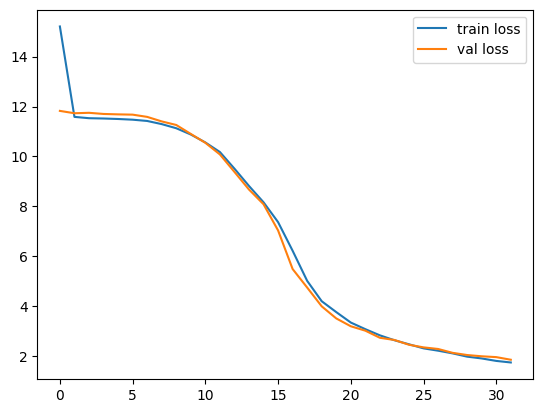

In [54]:
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=keras.optimizers.Adam(learning_rate=0.001))

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model_final.fit(
    x=[X_train, train_y, train_input_len, train_label_len],
    y=train_output,
    validation_data=([X_test, valid_y, valid_input_len, valid_label_len], valid_output),
    epochs=32,
    batch_size=96,
    shuffle=True,
    callbacks=[early_stopping],
)

# Plot the training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


 filename a_car_007639.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

 filename b_car_010713.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

 filename a_car_008702.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

 filename b_car_011525.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

 filename b_car_011071.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

 filename b_car_005361.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


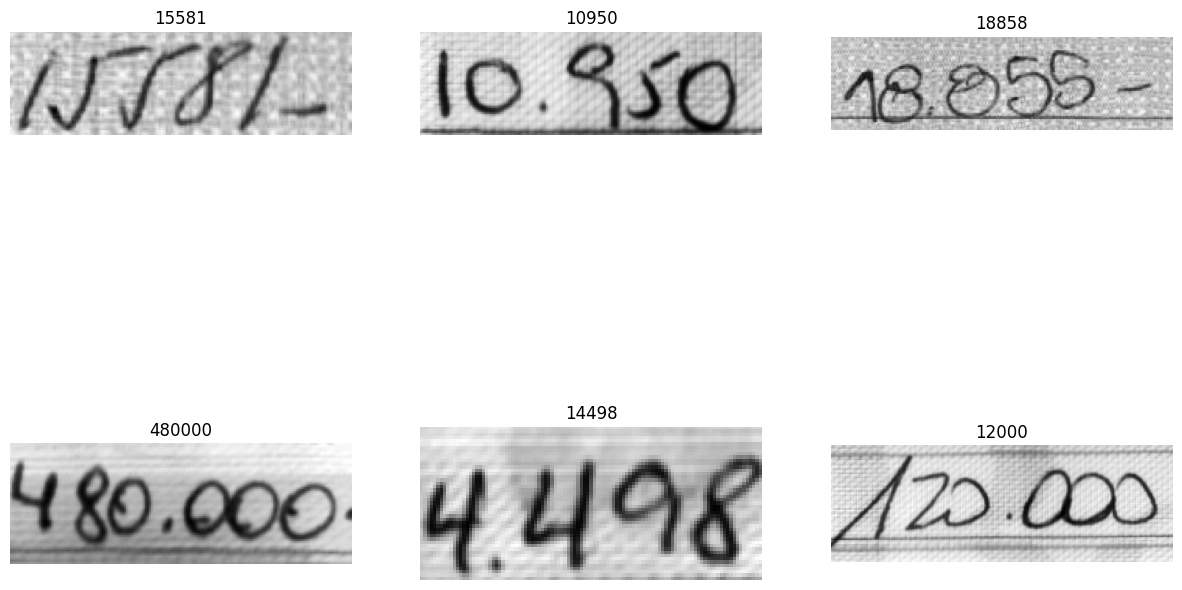

In [59]:
import random
plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    fold_dir = destination_dir  # Use the correct directory for your images
    filename = random.sample((os.listdir(fold_dir)), 1)
    filename = "".join(str(e) for e in filename)
    print('\n filename', filename)
    img_dir = os.path.join(fold_dir, filename)
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    image = preprocess(image, (128, 32))
    image = image / 255.0
    pred = model.predict(image.reshape(1, 128, 32, 1))
    decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(pred, input_length=np.ones(pred.shape[0]) * pred.shape[1], greedy=True)[0][0])

    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')

plt.show()


In [ ]:
# import os
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.applications import ResNet50
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Constants
# alphabets = u"0123456789' "
# max_str_len = 10
# num_of_characters = len(alphabets) + 1
# num_of_timestamps = 32

# # Function to preprocess images
# def preprocess(img, imgSize):
#     ''' resize, transpose and standardization grayscale images '''
#     widthTarget, heightTarget = imgSize
#     height, width = img.shape
#     factor_x = width / widthTarget
#     factor_y = height / heightTarget

#     factor = max(factor_x, factor_y)
#     newSize = (min(widthTarget, int(width / factor)), min(heightTarget, int(height / factor)))

#     img = cv2.resize(img, newSize)
#     target = np.ones(shape=(heightTarget, widthTarget), dtype='uint8') * 255
#     target[0:newSize[1], 0:newSize[0]] = img
#     img = cv2.transpose(target)
#     mean, stddev = cv2.meanStdDev(img)
#     mean = mean[0][0]
#     stddev = stddev[0][0]
#     img = img - mean
#     img = img // stddev if stddev > 0 else img
#     return img

# # Function to load data and preprocess
# def load_data(image_dir, label_dict):
#     images = []
#     labels = []
#     for image_file in os.listdir(image_dir):
#         if image_file.endswith(('.png', '.jpg', '.jpeg')):
#             img_path = os.path.join(image_dir, image_file)
#             image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#             image = preprocess(image, (128, 32))
#             images.append(image / 255.0)
#             labels.append(label_dict[image_file])
#     images = np.array(images).reshape(-1, 128, 32, 1)
#     labels = np.array(labels)
#     return images, labels

# images, labels = load_data(destination_dir, all_labels_dict)

# # Split the data
# train_size = int(len(images) * 0.8)
# X_train, X_test = images[:train_size], images[train_size:]
# y_train, y_test = labels[:train_size], labels[train_size:]

# print('\n X_train.shape', X_train.shape)
# print('\n X_test.shape', X_test.shape)
# print('\n Example of y_test', y_test[0])

# plt.figure(num='multi digit', figsize=(9, 18))
# for i in range(3):
#     plt.subplot(3, 1, i + 1)
#     plt.title(y_test[i])
#     plt.imshow(np.squeeze(X_test[i]), cmap='gray')
# plt.show()

# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=10,
#     zoom_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1
# )

# # Convert labels to numeric form
# def label_to_num(label):
#     return np.array([alphabets.find(ch) for ch in label])

# def num_to_label(num):
#     return ''.join([alphabets[ch] for ch in num if ch != -1])

# train_size = len(y_train)
# valid_size = len(y_test)

# train_y = np.ones([train_size, max_str_len]) * -1
# train_label_len = np.zeros([train_size, 1])
# train_input_len = np.ones([train_size, 1]) * (num_of_timestamps - 2)
# train_output = np.zeros([train_size])

# for i in range(train_size):
#     train_label_len[i] = len(y_train[i])
#     train_y[i, 0:len(y_train[i])] = label_to_num(y_train[i])

# valid_y = np.ones([valid_size, max_str_len]) * -1
# valid_label_len = np.zeros([valid_size, 1])
# valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps - 2)
# valid_output = np.zeros([valid_size])

# for i in range(valid_size):
#     valid_label_len[i] = len(y_test[i])
#     valid_y[i, 0:len(y_test[i])] = label_to_num(y_test[i])

# # Build the model with ResNet50 backbone
# def build_model(img_width=128, img_height=32, max_str_len=10):
#     input_img = layers.Input(shape=(img_width, img_height, 1), name="image", dtype="float32")

#     # Using ResNet50 as a backbone for feature extraction
#     base_model = ResNet50(weights=None, include_top=False, input_shape=(img_width, img_height, 1))
#     x = base_model(input_img)

#     # Get the output shape of the ResNet50 model
#     resnet_shape = base_model.output_shape
#     resnet_height, resnet_width, resnet_channels = resnet_shape[1], resnet_shape[2], resnet_shape[3]
#     new_shape = (resnet_height, resnet_width * resnet_channels)
#     x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
#     x = layers.Dense(64, activation="relu", name="dense1")(x)
#     x = layers.Dropout(0.2)(x)

#     x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.25))(x)
#     x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)

#     y_pred = layers.Dense(num_of_characters, activation="softmax", name="dense2")(x)
#     model = keras.models.Model(inputs=input_img, outputs=y_pred, name="functional_1")

#     def ctc_lambda_func(args):
#         y_pred, labels, input_length, label_length = args
#         y_pred = y_pred[:, 2:, :]
#         return tf.keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)

#     labels = layers.Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
#     input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
#     label_length = layers.Input(name='label_length', shape=[1], dtype='int64')

#     ctc_loss = keras.layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
#     model_final = keras.models.Model(inputs=[input_img, labels, input_length, label_length], outputs=ctc_loss, name="ocr_model_v1")

#     return model, model_final

# model, model_final = build_model()
# model.summary()
# model_final.summary()

# # Compile the model
# model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=keras.optimizers.Adam(learning_rate=0.0001))

# # Training with data augmentation
# early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
# reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# # Create a generator for training data
# def train_generator(batch_size):
#     while True:
#         x = np.zeros((batch_size, 128, 32, 1), dtype=np.float32)
#         y = np.ones((batch_size, max_str_len)) * -1
#         label_length = np.zeros((batch_size, 1))
#         input_length = np.ones((batch_size, 1)) * (num_of_timestamps - 2)
#         output = np.zeros((batch_size,))
#         for i in range(batch_size):
#             index = np.random.randint(0, len(X_train))
#             x[i] = X_train[index]
#             y[i, :len(y_train[index])] = label_to_num(y_train[index])
#             label_length[i] = len(y_train[index])
#         yield [x, y, input_length, label_length], output

# batch_size = 64

# history = model_final.fit(
#     train_generator(batch_size),
#     steps_per_epoch=len(X_train) // batch_size,
#     validation_data=([X_test, valid_y, valid_input_len, valid_label_len], valid_output),
#     epochs=50,
#     callbacks=[early_stopping, reduce_lr]
# )

# # Testing the model
# import random
# plt.figure(figsize=(15, 10))
# for i in range(6):
#     ax = plt.subplot(2, 3, i + 1)
#     fold_dir = destination_dir
#     filename = random.sample((os.listdir(fold_dir)), 1)
#     filename = "".join(str(e) for e in filename)  # Remove brackets
#     print('\n filename', filename)
#     img_dir = os.path.join(fold_dir, filename)
#     image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
#     plt.imshow(image, cmap='gray')
#     image = preprocess(image, (128, 32))
#     image = image / 255.0
#     pred = model.predict(image.reshape(1, 128, 32, 1))
#     decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(pred, input_length=np.ones(pred.shape[0]) * pred.shape[1], greedy=True)[0][0])

#     plt.title(num_to_label(decoded[0]), fontsize=12)
#     plt.axis('off')
# plt.show()


#some other foundation i a have , but it does not work properly

In [ ]:
import os
import cv2
import numpy as np

def load_data(image_dir, label_dict):
    images = []
    labels = []
    for image_file in os.listdir(image_dir):
        if image_file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_dir, image_file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(label_dict[image_file])
    images = np.array(images).reshape(-1, 128, 128, 1)
    labels = np.array(labels)
    return images, labels

# Load the data
images, labels = load_data(destination_dir, all_labels_dict)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


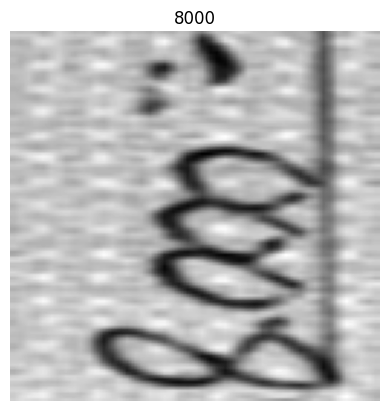

In [ ]:
plt.imshow(X_train[0].squeeze(), cmap='gray')
plt.title(y_train[0])
plt.axis('off')
plt.show()

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
y_test.shape

9375
9375
2344
2344


(2344,)

In [ ]:
# import os
# import cv2
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split

# alphabets = u"0123456789' "
# max_str_len = 10
# num_of_characters = len(alphabets) + 1
# num_of_timestamps = 32

# # # Function to load data
# # def load_data(image_dir, label_dict):
# #     images = []
# #     labels = []
# #     for image_file in os.listdir(image_dir):
# #         if image_file.endswith(('.png', '.jpg', '.jpeg')):
# #             img_path = os.path.join(image_dir, image_file)
# #             image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# #             image = cv2.resize(image, (128, 128))
# #             images.append(image)
# #             labels.append(label_dict[image_file])
# #     images = np.array(images).reshape(-1, 128, 128, 1)
# #     labels = np.array(labels)
# #     return images, labels

# # # Load the data
# # destination_dir = "path_to_images"  # Update with the path to your images
# # all_labels_dict = {"image1.png": "39816931", "image2.png": "12345678"}  # Update with your label dictionary

# # images, labels = load_data(destination_dir, all_labels_dict)

# # # Split the data
# # X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# def label_to_num(label):
#     return np.array([alphabets.find(ch) for ch in label])

# def num_to_label(num):
#     return ''.join([alphabets[ch] for ch in num if ch != -1])

# train_size = len(y_train)
# valid_size = len(y_test)

# train_y = np.ones([train_size, max_str_len]) * -1
# train_label_len = np.zeros([train_size, 1])
# train_input_len = np.ones([train_size, 1]) * (num_of_timestamps - 2)
# train_output = np.zeros([train_size])

# for i in range(train_size):
#     train_label_len[i] = len(y_train[i])
#     train_y[i, 0:len(y_train[i])] = label_to_num(y_train[i])

# valid_y = np.ones([valid_size, max_str_len]) * -1
# valid_label_len = np.zeros([valid_size, 1])
# valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps - 2)
# valid_output = np.zeros([valid_size])

# for i in range(valid_size):
#     valid_label_len[i] = len(y_test[i])
#     valid_y[i, 0:len(y_test[i])] = label_to_num(y_test[i])

# def build_model(img_width=192, img_height=192, max_str_len=10):
#     input_img = layers.Input(shape=(img_width, img_height, 1), name="image", dtype="float32")

#     x = layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv1")(input_img)
#     x = layers.MaxPooling2D((2, 2), name="pool1")(x)

#     x = layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2")(x)
#     x = layers.MaxPooling2D((2, 2), name="pool2")(x)

#     new_shape = ((img_width // 4), (img_height // 4) * 64)
#     x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
#     x = layers.Dense(64, activation="relu", name="dense1")(x)
#     x = layers.Dropout(0.2)(x)

#     x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
#     x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

#     y_pred = layers.Dense(num_of_characters, activation="softmax", name="dense2")(x)
#     model = keras.models.Model(inputs=input_img, outputs=y_pred, name="functional_1")

#     def ctc_lambda_func(args):
#         y_pred, labels, input_length, label_length = args
#         y_pred = y_pred[:, 2:, :]
#         return tf.keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)

#     labels = layers.Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
#     input_length = layers.Input(name='input_length', shape=[1], dtype='int64')
#     label_length = layers.Input(name='label_length', shape=[1], dtype='int64')

#     ctc_loss = keras.layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
#     model_final = keras.models.Model(inputs=[input_img, labels, input_length, label_length], outputs=ctc_loss, name="ocr_model_v1")

#     return model, model_final

# model, model_final = build_model()
# model.summary()
# model_final.summary()



In [ ]:
# model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=keras.optimizers.Adam(learning_rate=0.001))

# early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# model_final.fit(
#     x=[X_train, train_y, train_input_len, train_label_len],
#     y=train_output,
#     validation_data=([X_test, valid_y, valid_input_len, valid_label_len], valid_output),
#     epochs=25,
#     batch_size=128,
#     callbacks=[early_stopping]
# )

In [ ]:
# import matplotlib.pyplot as plt
# import random

# # plt.figure(figsize=(15, 10))
# # for i in range(6):
# #     ax = plt.subplot(2, 3, i+1)
# #     fold_dir = '/content/all_images_preproc'
# #     filename = random.sample((os.listdir(fold_dir)), 1)
# #     filename = "".join(str(e) for e in filename)
# #     img_dir = os.path.join(fold_dir, filename)
# #     image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
# #     plt.imshow(image, cmap='gray')
# #     image = cv2.resize(image, (128, 128))
# #     image = image / 255.0
# #     pred = model.predict(image.reshape(1, 128, 128, 1))
# #     decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1],
# #                                                                      greedy=True)[0][0])
# #     plt.title(num_to_label(decoded), fontsize=12)
# #     plt.axis('off')

# # Prediction on the specified image
# def preprocess(image, size):
#     return cv2.resize(image, size)

# specified_img_path = "/content/pic.png"
# specified_image = cv2.imread(specified_img_path, cv2.IMREAD_GRAYSCALE)
# specified_image = preprocess(specified_image, (128, 128))
# specified_image = specified_image / 255.0
# pred = model.predict(specified_image.reshape(1, 128, 128, 1))
# decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1],
#                                                                  greedy=True)[0][0])
# predicted_label = num_to_label(decoded[0])

# print("Predicted digits for the specified image:", predicted_label)

In [ ]:
# def test_model_on_example(model, example_image):
#     pred = model.predict(example_image)
#     pred_decoded = tf.keras.backend.get_value(tf.keras.backend.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1],
#                                        greedy=True)[0][0])
#     # pred_labels = pred_decoded.numpy()
#     print(pred_decoded)
#     pred_text = num_to_label(pred_decoded[0])
#     return pred_text

# # Example usage
# example_image = X_test[0:1]  # Get one example image from test set
# predicted_text = test_model_on_example(model, example_image)
# print(f"Predicted Text: {predicted_text}")

In [ ]:
# plt.imshow(X_test[0:1].squeeze(), cmap='gray')
# plt.title(y_test[0])
# plt.axis('off')
# plt.show()
X_test[0].squeeze().shape

(192, 192)

In [ ]:
# import numpy as np
# import tensorflow as tf

# def num_to_label(num):
#     return ''.join([alphabets[ch] for ch in num if ch != -1])

# def test_model_on_example(model, example_image):
#     pred = model.predict(example_image)
#     input_length = np.ones(pred.shape[0]) * pred.shape[1]
#     pred_decoded, _ = tf.keras.backend.ctc_decode(pred, input_length=input_length, greedy=True)
#     pred_decoded = tf.keras.backend.get_value(pred_decoded[0])

#     print(pred_decoded)  # Print the decoded prediction for debugging

#     pred_text = ''.join([num_to_label(seq) for seq in pred_decoded])
#     return pred_text

# # Example usage
# example_image = X_test[0:1]  # Get one example image from test set
# predicted_text = test_model_on_example(model, example_image)
# print(f"Predicted Text: {predicted_text}")


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Dense, Dropout, GRU, Bidirectional
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Define CTC loss
# def ctc_lambda_func(args):
#     y_pred, labels, input_length, label_length = args
#     return tf.keras.backend.ctc_batch_cost(labels, y_pred, input_length, label_length)

# # Define the model
# def build_model(input_shape, output_units):
#     input_data = Input(name='input', shape=input_shape, dtype='float32')

#     inner = Conv2D(32, (3, 3), padding='same', activation='relu')(input_data)
#     inner = MaxPooling2D(pool_size=(2, 2))(inner)
#     inner = Dropout(0.25)(inner)

#     inner = Conv2D(64, (3, 3), padding='same', activation='relu')(inner)
#     inner = MaxPooling2D(pool_size=(2, 2))(inner)
#     inner = Dropout(0.25)(inner)

#     inner = Conv2D(128, (3, 3), padding='same', activation='relu')(inner)
#     inner = MaxPooling2D(pool_size=(2, 2))(inner)
#     inner = Dropout(0.25)(inner)

#     conv_to_rnn_dims = (input_shape[0] // 8, (input_shape[1] // 8) * 128)
#     inner = Reshape(target_shape=conv_to_rnn_dims)(inner)

#     inner = Bidirectional(GRU(128, return_sequences=True))(inner)
#     inner = Dropout(0.25)(inner)
#     inner = Bidirectional(GRU(128, return_sequences=True))(inner)
#     inner = Dropout(0.25)(inner)

#     inner = Dense(output_units, activation='softmax')(inner)

#     y_pred = inner

#     labels = Input(name='labels', shape=[None], dtype='float32')
#     input_length = Input(name='input_length', shape=[1], dtype='int64')
#     label_length = Input(name='label_length', shape=[1], dtype='int64')

#     ctc_loss = tf.keras.layers.Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])

#     model = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)
#     prediction_model = Model(inputs=input_data, outputs=y_pred)

#     return model, prediction_model

# input_shape = (128, 128, 1)
# output_units = 11

# model, prediction_model = build_model(input_shape, output_units)


# model.compile(optimizer=Adam(), loss={'ctc': lambda y_true, y_pred: y_pred})


# images, labels = load_data(destination_dir, all_labels_dict)

# train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
# print(len(train_images) , len(train_labels))
# def data_generator(images, labels, batch_size):
#     while True:
#         for i in range(0, len(images), batch_size):
#             batch_images = images[i:i + batch_size]
#             batch_labels = labels[i:i + batch_size]

#             current_batch_size = len(batch_images)

#             batch_input_length = np.ones((current_batch_size, 1)) * (input_shape[1] // 8)
#             batch_label_length = np.array([len(label) for label in batch_labels]).reshape(-1, 1)

#             max_label_length = max([len(label) for label in batch_labels])
#             padded_labels = np.zeros((current_batch_size, max_label_length))
#             for j in range(current_batch_size):
#                 padded_labels[j, :len(batch_labels[j])] = batch_labels[j]

#             yield {
#                 'input': batch_images,
#                 'labels': padded_labels,
#                 'input_length': batch_input_length,
#                 'label_length': batch_label_length
#             }, np.zeros(current_batch_size)


# batch_size = 16
# epochs = 10

# train_generator = data_generator(train_images, train_labels, batch_size)
# test_generator = data_generator(test_images, test_labels, batch_size)

# model.fit(train_generator,
#           steps_per_epoch=len(train_images) // batch_size,
#           validation_data=test_generator,
#           validation_steps=len(test_images) // batch_size,
#           epochs=epochs)

# # Save the model
# # prediction_model.save('/content/rnn_ctc_model.h5')


In [ ]:
# import numpy as np
# import cv2
# import os
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Lambda, TimeDistributed
# from tensorflow.keras.models import Model
# from tensorflow.keras import backend as K
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.callbacks import EarlyStopping


# def ctc_lambda_func(args):
#     y_pred, labels, input_length, label_length = args
#     return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

# input_shape = (128, 128, 1)
# num_classes = 10

# base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
# base_model.trainable = False

# inputs = Input(name='input', shape=input_shape, dtype='float32')
# x = tf.keras.layers.Concatenate()([inputs, inputs, inputs])

# x = base_model(x, training=False)

# x = Reshape((x.shape[1] * x.shape[2], x.shape[3]))(x)

# rnn_1 = Bidirectional(LSTM(128, return_sequences=True))(x)
# rnn_2 = Bidirectional(LSTM(128, return_sequences=True))(rnn_1)

# dense_2 = TimeDistributed(Dense(num_classes + 1, activation='softmax'))(rnn_2)

# labels = Input(name='the_labels', shape=[None], dtype='int32')
# input_length = Input(name='input_length', shape=[1], dtype='int32')
# label_length = Input(name='label_length', shape=[1], dtype='int32')

# ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([dense_2, labels, input_length, label_length])

# model = Model(inputs=[inputs, labels, input_length, label_length], outputs=ctc_loss)

# model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='adam')

# model.summary()

# def data_generator(images, labels, batch_size=32):
#     while True:
#         for start in range(0, len(images), batch_size):
#             end = min(start + batch_size, len(images))
#             X_batch = images[start:end]
#             y_batch = labels[start:end]
#             input_length = np.ones((len(X_batch), 1)) * (x.shape[1])
#             label_length = np.array([len(label) for label in y_batch])
#             y_batch_padded = np.zeros((len(y_batch), max(label_length)))
#             for i, label in enumerate(y_batch):
#                 y_batch_padded[i, :len(label)] = label
#             yield [X_batch, y_batch_padded, input_length, label_length], np.zeros(len(X_batch))

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# model.fit(data_generator(X_train, y_train),
#           validation_data=data_generator(X_test, y_test),
#           epochs=10,
#           steps_per_epoch=len(X_train) // 32,
#           validation_steps=len(X_test) // 32,
#           callbacks=[early_stopping])

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator for data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True
# )

# # Fit the generator on the training data
# datagen.fit(X_train)
